In [1]:
# 1.	Load the basic libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [2]:
# 2.	Load the dataset

data = pd.read_csv('/content/naivebayes.csv')
data

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
# 3.	Analyse the dataset

data.describe()

,Age,Salary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [40]:
# 4.	Normalize the data

def Feature_Normalization(X):
  X = (X - np.mean(X)) / np.std(X)  # Calculate mean and std across the entire 1D array
  return X

In [41]:
# 5.	Pre-process the data

x = data.iloc[: , :-1].values
y = data.iloc[: , -1].values

# Initialize x_norm as a list to store normalized features
x_norm = []

for i in range(x.shape[1]):  # Iterate through columns of x
    norm_feature = Feature_Normalization(x[:, i])
    x_norm.append(norm_feature)  # Append normalized feature to the list

# Convert the list of normalized features to a NumPy array
x_norm = np.array(x_norm).T  # Transpose to get the desired shape
x_norm

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

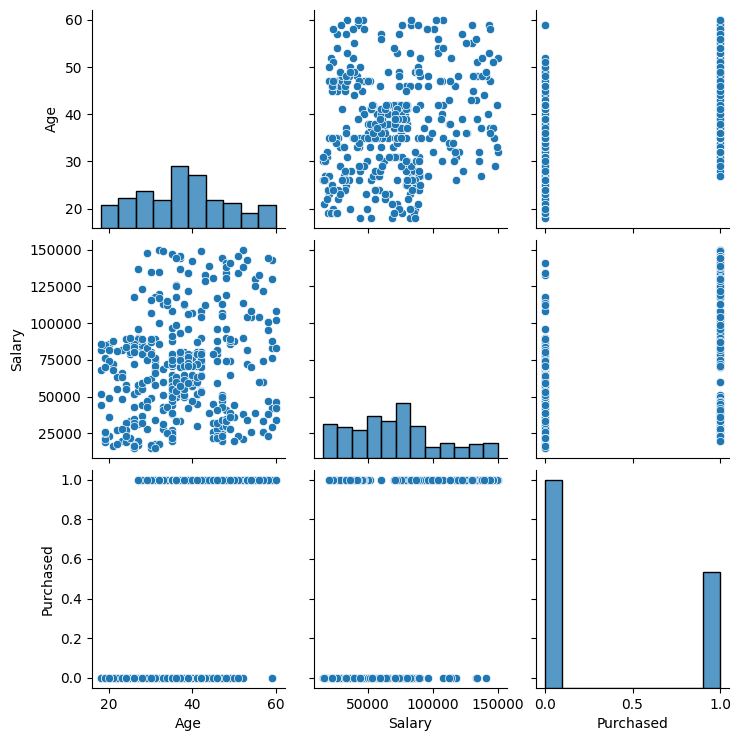

In [43]:
# 6.	Visualize the Data

sns.pairplot(data)
plt.show()

In [44]:
# 7.	Separate the training and testing data

x_train , x_test , y_train , y_test = train_test_split(x_norm , y , test_size = 0.2 , random_state = 42)

In [45]:
# 8.	Apply the Bernoulli Naïve Bayes algorithm

model = BernoulliNB()
model.fit(x_train , y_train)


BernoulliNB()

In [55]:
# 9.	Predict the testing dataset

y_pred_Bernoulli = model.predict(x_test)

In [56]:
# 10.	Obtain the confusion matrix

cm = confusion_matrix(y_test , y_pred_Bernoulli)
cm

array([[50,  2],
       [ 3, 25]])

In [57]:
# 11.	Obtain the accuracy score

accuracy_score(y_test , y_pred_Bernoulli)

0.9375

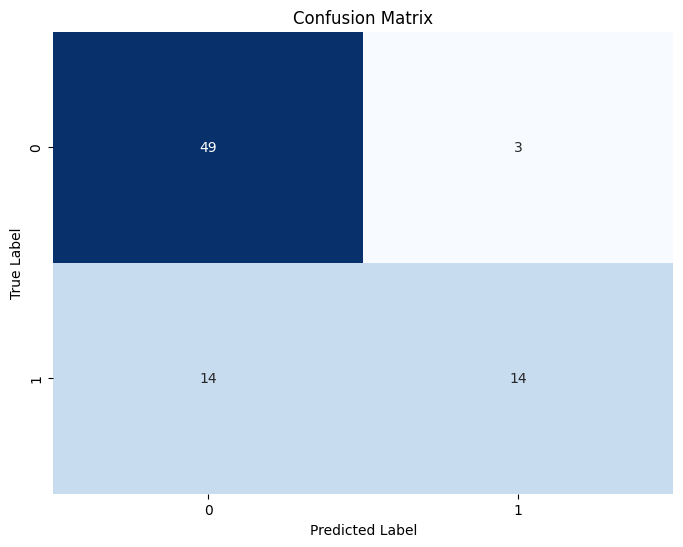

In [49]:
# 12.	Visualize the classified dataset

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [50]:
# 13.	Apply the Gaussian Naïve Bayes algorithm

model = GaussianNB()
model.fit(x_train , y_train)

GaussianNB()

In [58]:
# 14.	Predict the testing dataset

y_pred_GaussianNB = model.predict(x_test)

In [59]:
# 15.	Obtain the confusion matrix

cm = confusion_matrix(y_test , y_pred_GaussianNB)
cm

array([[50,  2],
       [ 3, 25]])

In [60]:
# 16.	Obtain the accuracy score

accuracy_score(y_test , y_pred_GaussianNB)

0.9375

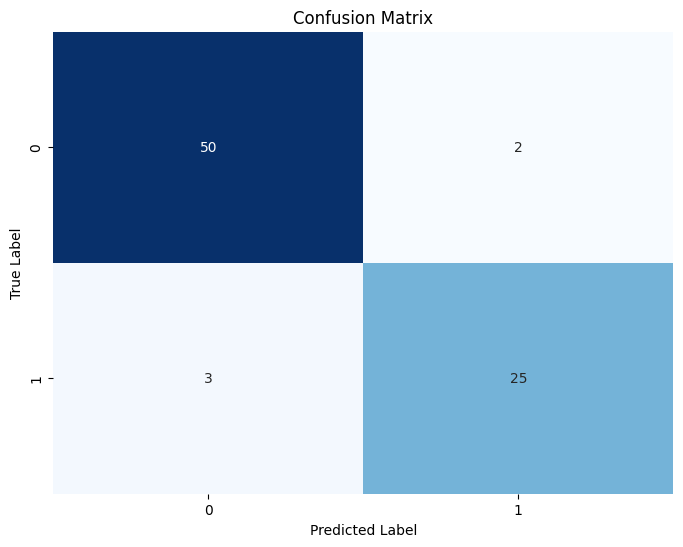

In [54]:
# 17.	Visualize the classified dataset

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [62]:
# a.	Classified dataset using Bernoulli Naïve Bayes

y_pred_Bernoulli

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [63]:
# b.	Classified dataset using Gaussian Naïve Bayes

y_pred_GaussianNB

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])